## simple and powerful pandas EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
plt.style.use("seaborn")

In [3]:
df = pd.read_csv("kaggle_survey_2022_responses.csv.zip", low_memory=False)
df.shape

(23998, 296)

In [4]:
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [6]:
df.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)

### Question

In [7]:
q = df.iloc[0]
q

Duration (in seconds)                                Duration (in seconds)
Q2                                             What is your age (# years)?
Q3                                  What is your gender? - Selected Choice
Q4                               In which country do you currently reside?
Q5                       Are you currently a student? (high school, uni...
                                               ...                        
Q44_8                    Who/what are your favorite media sources that ...
Q44_9                    Who/what are your favorite media sources that ...
Q44_10                   Who/what are your favorite media sources that ...
Q44_11                   Who/what are your favorite media sources that ...
Q44_12                   Who/what are your favorite media sources that ...
Name: 0, Length: 296, dtype: object

In [8]:
df.iloc[0]["Q2"]

'What is your age (# years)?'

<AxesSubplot:>

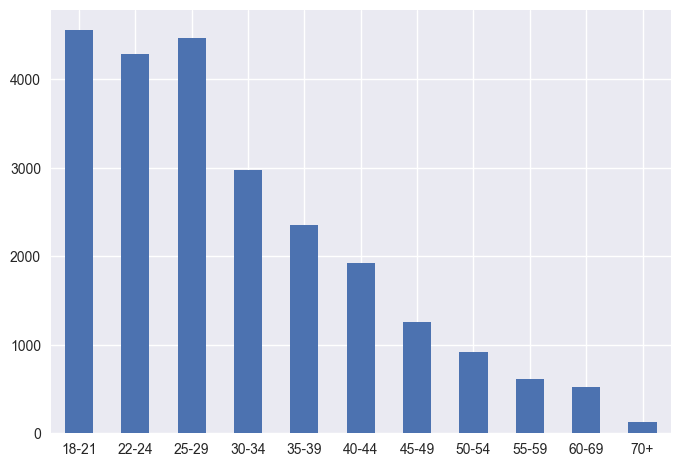

In [9]:
df["Q2"][1:].value_counts().sort_index().plot(kind="bar", rot=0)

In [10]:
"Q6" in df.iloc[0].index

False

In [11]:
def q_plot(df, q_no):
    if q_no in df.iloc[0].index:
        print(df.iloc[0][q_no])
        q_count = df[q_no][1:].value_counts().sort_index()
        plot_kind = "bar"
        figsize = (10, 4)
        if len(q_count) > 5:
            plot_kind = "barh"
            figsize = (10, 10)
        q_count.plot(kind=plot_kind, rot=0, figsize=figsize)
    else:
        print("Invalid Question No.")

What is your gender? - Selected Choice


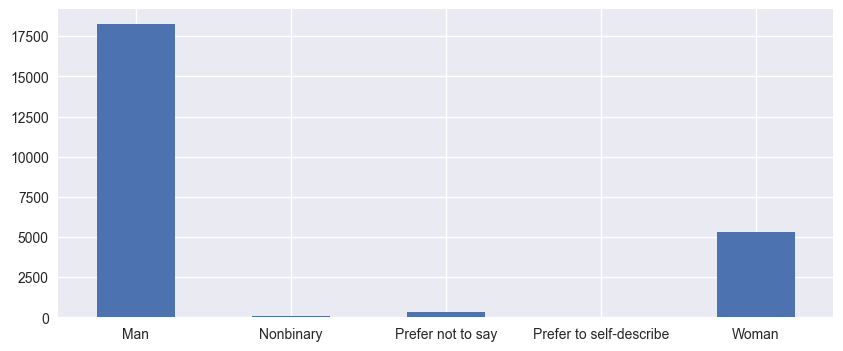

In [12]:
q_plot(df, q_no="Q3")

In [13]:
df["Q2"][1:]

1        30-34
2        30-34
3        18-21
4        55-59
5        45-49
         ...  
23993    22-24
23994    60-69
23995    25-29
23996    35-39
23997    18-21
Name: Q2, Length: 23997, dtype: object

In [14]:
age_gender = pd.crosstab(df["Q2"][1:], df["Q3"][1:])
age_gender

Q3,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q2,,,,,
18-21,3310,13,69,7,1160
22-24,3168,15,50,6,1044
25-29,3425,14,56,6,971
30-34,2248,12,43,6,663
35-39,1791,6,36,1,519
40-44,1480,6,29,2,410
45-49,997,6,10,1,239
50-54,759,0,14,1,140
55-59,506,3,13,0,89


<AxesSubplot:xlabel='Q2', ylabel='Q3'>

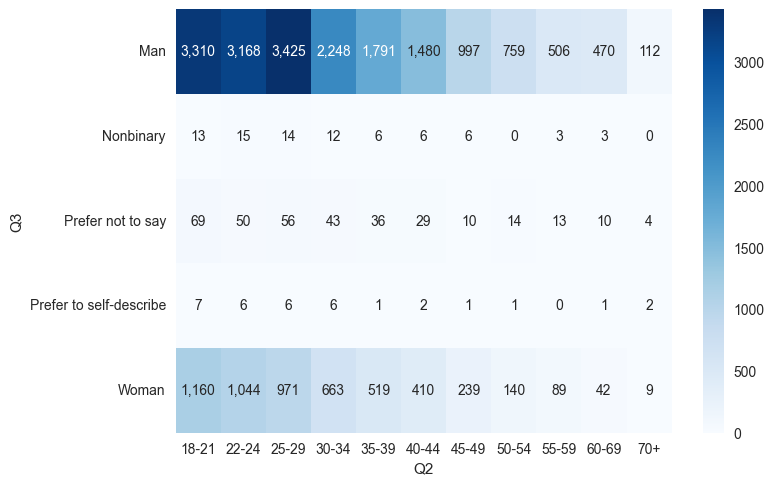

In [15]:
sns.heatmap(age_gender.T, annot=True, cmap="Blues", fmt=",.0f")

In which country do you currently reside?


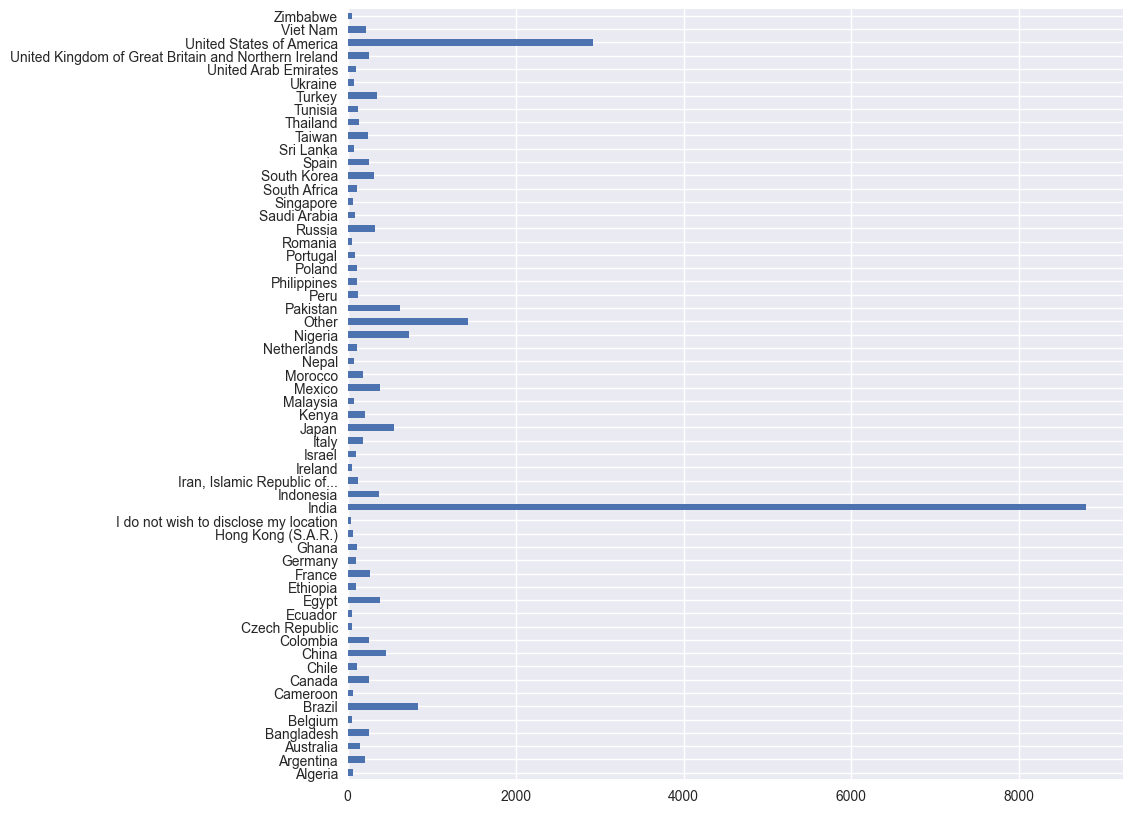

In [16]:
q_plot(df, q_no="Q4")

In [17]:
country_gender = pd.crosstab(df["Q4"][1:], df["Q3"][1:])

<AxesSubplot:xlabel='Q3', ylabel='Q4'>

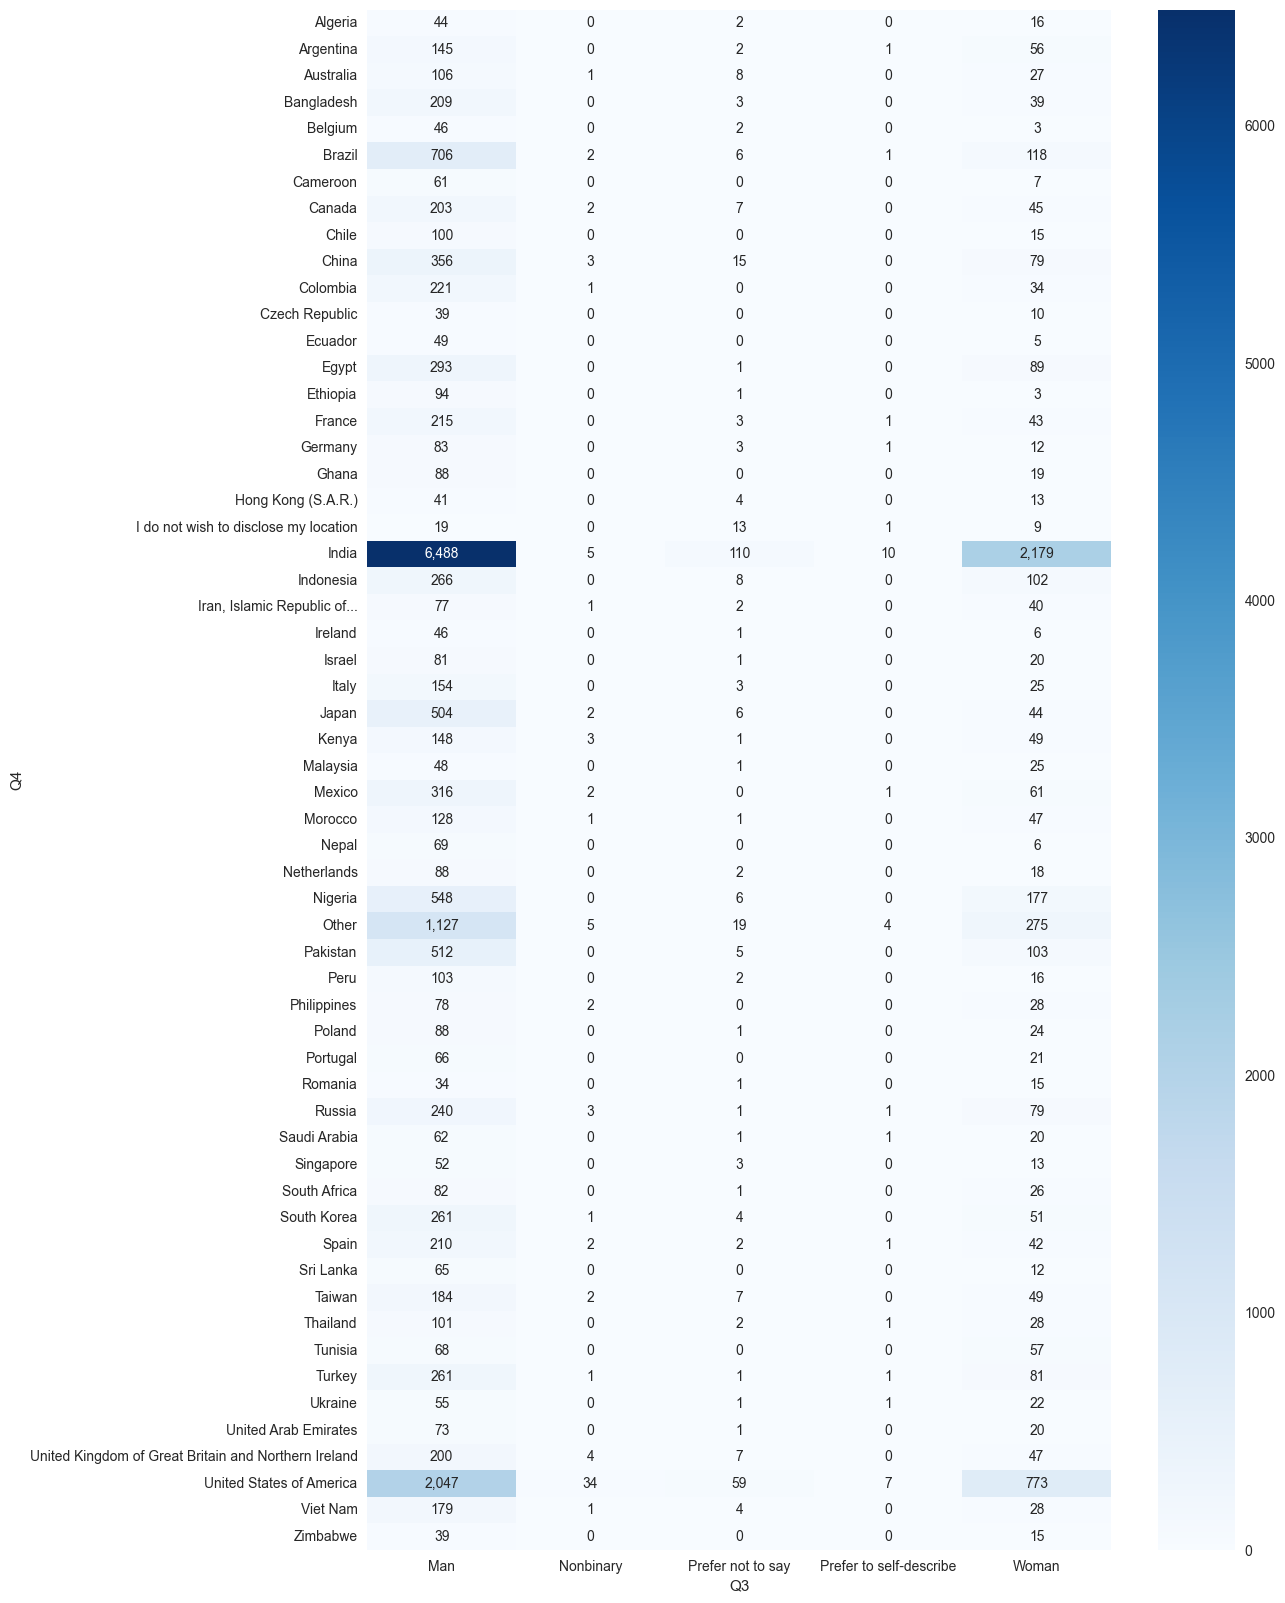

In [18]:
plt.figure(figsize=(12, 20))
sns.heatmap(country_gender, annot=True, cmap="Blues", fmt=",.0f")

Are you currently a student? (high school, university, or graduate)


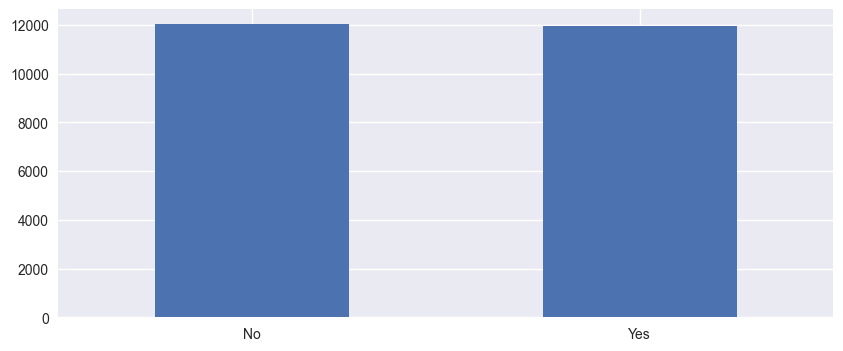

In [19]:
q_plot(df, q_no="Q5")

## choice type

In [20]:
single_choice = [qi for qi in q.index if "_" not in qi]
single_choice

['Duration (in seconds)',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q8',
 'Q9',
 'Q11',
 'Q16',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q29',
 'Q30',
 'Q32',
 'Q43']

In [21]:
multiple_choice = {qi.split("_")[0] for qi in q.index if "_" in qi}
multiple_choice

{'Q10',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q28',
 'Q31',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q44',
 'Q6',
 'Q7'}

## sigle choice No

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


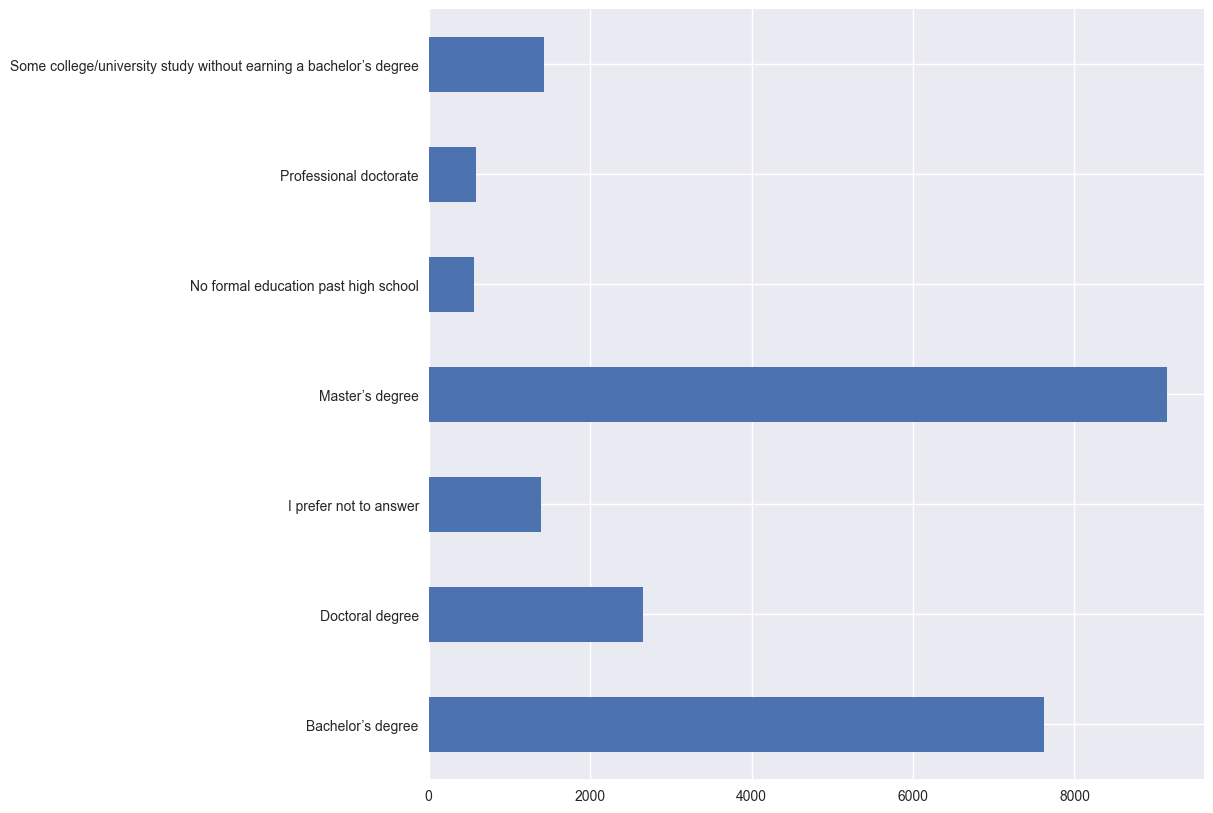

In [22]:
q_plot(df, q_no="Q8")

Have you ever published any academic research (papers, preprints, conference proceedings, etc)?


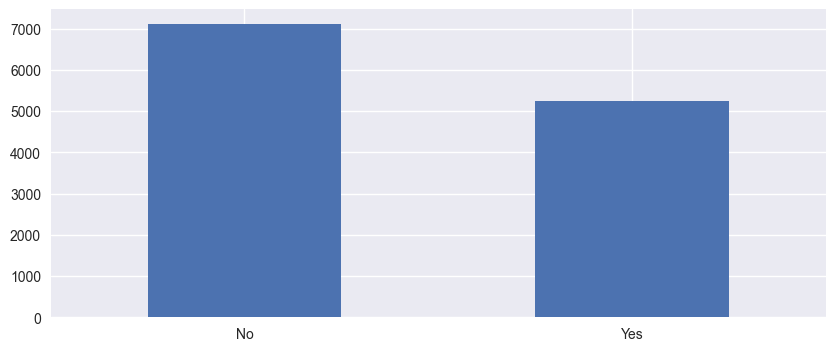

In [23]:
q_plot(df, q_no="Q9")

For how many years have you been writing code and/or programming?


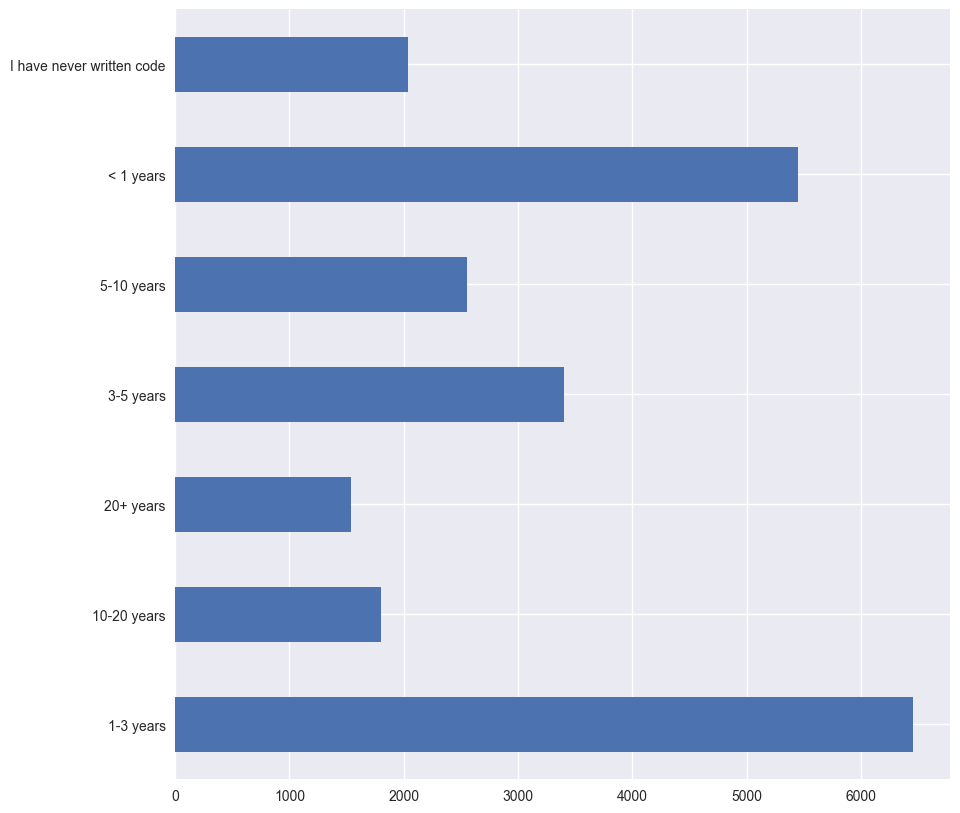

In [24]:
q_plot(df, q_no="Q11")

For how many years have you used machine learning methods?


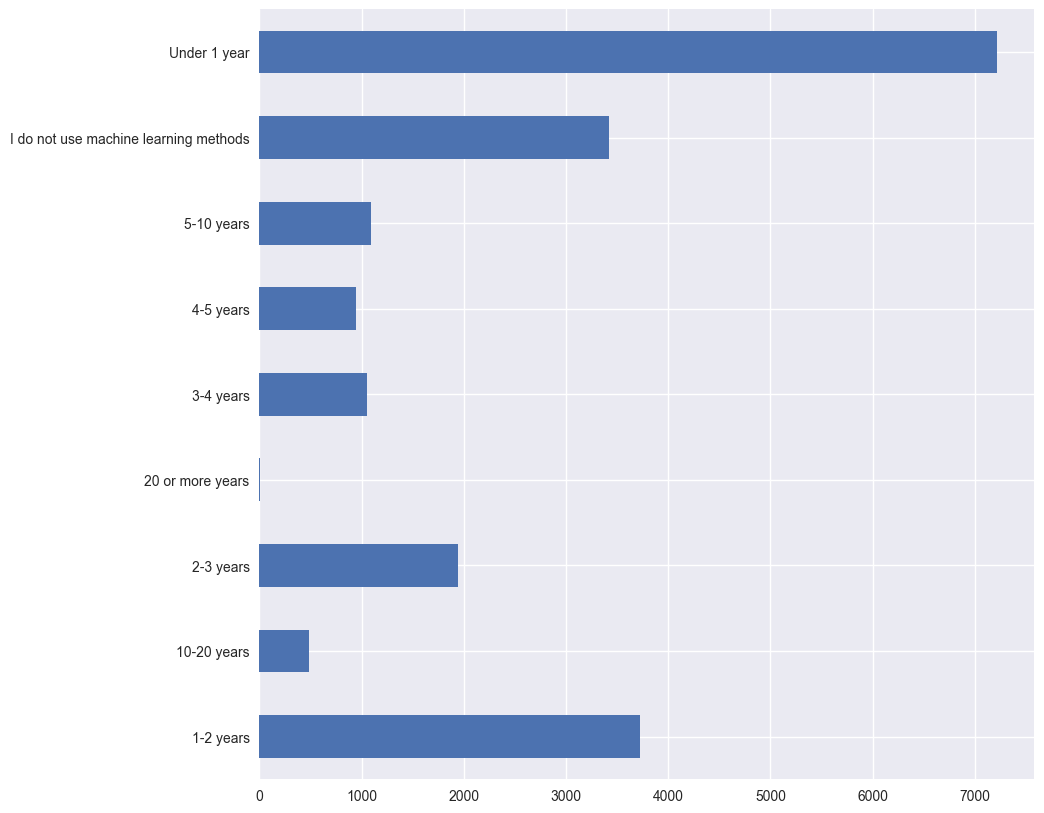

In [25]:
q_plot(df, q_no="Q16")

In [26]:
for q_no in single_choice[1:]:
    print(q[q_no])
    display(df[q_no].value_counts()[:-1].to_frame().style.background_gradient().format("{:,}"))

What is your age (# years)?


,Q2
18-21,"4,559"
25-29,"4,472"
22-24,"4,283"
30-34,"2,972"
35-39,"2,353"
40-44,"1,927"
45-49,"1,253"
50-54,914
55-59,611
60-69,526


What is your gender? - Selected Choice


,Q3
Man,"18,266"
Woman,"5,286"
Prefer not to say,334
Nonbinary,78
Prefer to self-describe,33


In which country do you currently reside?


,Q4
India,"8,792"
United States of America,"2,920"
Other,"1,430"
Brazil,833
Nigeria,731
Pakistan,620
Japan,556
China,453
Egypt,383
Mexico,380


Are you currently a student? (high school, university, or graduate)


,Q5
No,"12,036"
Yes,"11,961"


What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


,Q8
Master’s degree,"9,142"
Bachelor’s degree,"7,625"
Doctoral degree,"2,657"
Some college/university study without earning a bachelor’s degree,"1,431"
I prefer not to answer,"1,394"
Professional doctorate,585
No formal education past high school,564


Have you ever published any academic research (papers, preprints, conference proceedings, etc)?


,Q9
No,"7,117"
Yes,"5,244"


For how many years have you been writing code and/or programming?


,Q11
1-3 years,"6,459"
< 1 years,"5,454"
3-5 years,"3,399"
5-10 years,"2,556"
I have never written code,"2,037"
10-20 years,"1,801"
20+ years,"1,537"


For how many years have you used machine learning methods?


,Q16
Under 1 year,"7,221"
1-2 years,"3,720"
I do not use machine learning methods,"3,419"
2-3 years,"1,947"
5-10 years,"1,090"
3-4 years,"1,053"
4-5 years,950
10-20 years,483
20 or more years,3


Which of the following ML model hubs/repositories do you use most often? - Selected Choice


,Q22
Kaggle datasets,"1,618"
TensorFlow Hub,799
Huggingface Models,502
PyTorch Hub,412
Timm,127
Other storage services (i.e. google drive),96
NVIDIA NGC models,69
ONNX models,46
Jumpstart,24


Select the title most similar to your current role (or most recent title if retired): - Selected Choice


,Q23
Data Scientist,"1,929"
"Data Analyst (Business, Marketing, Financial, Quantitative, etc)","1,538"
Currently not employed,"1,432"
Software Engineer,980
Teacher / professor,833
"Manager (Program, Project, Operations, Executive-level, etc)",832
Other,754
Research Scientist,593
Machine Learning/ MLops Engineer,571
Engineer (non-software),465


In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice


,Q24
Computers/Technology,"2,321"
Academics/Education,"1,447"
Accounting/Finance,802
Other,750
Manufacturing/Fabrication,561
Medical/Pharmaceutical,509
Government/Public Service,500
Online Service/Internet-based Services,461
Retail/Sales,398
Energy/Mining,320


What is the size of the company where you are employed?


,Q25
0-49 employees,"2,130"
"10,000 or more employees","2,122"
"1000-9,999 employees","1,888"
50-249 employees,"1,564"
250-999 employees,"1,362"


Approximately how many individuals are responsible for data science workloads at your place of business?


,Q26
20+,"2,270"
1-2,"1,815"
0,"1,457"
3-4,"1,392"
5-9,"1,141"
10-14,653
15-19,262


Does your current employer incorporate machine learning methods into their business?


,Q27
No (we do not use ML methods),"1,970"
"We have well established ML methods (i.e., models in production for more than 2 years)","1,778"
We are exploring ML methods (and may one day put a model into production),"1,552"
I do not know,"1,438"
"We recently started using ML methods (i.e., models in production for less than 2 years)","1,209"
We use ML methods for generating insights (but do not put working models into production),925


What is your current yearly compensation (approximate $USD)?


,Q29
$0-999,"1,112"
"10,000-14,999",493
"30,000-39,999",464
"1,000-1,999",444
"40,000-49,999",421
"100,000-124,999",404
"5,000-7,499",391
"50,000-59,999",366
"7,500-9,999",362
"150,000-199,999",342


Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?
 (approximate $USD)?


,Q30
$0 ($USD),"2,822"
$100-$999,"2,078"
"$1000-$9,999","1,469"
$1-$99,"1,449"
"$10,000-$99,999",480
"$100,000 or more ($USD)",186


Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? - Selected Choice


,Q32
Amazon Web Services (AWS),555
Google Cloud Platform (GCP),501
They all had a similarly enjoyable developer experience,443
Microsoft Azure,256
None were satisfactory,72
IBM Cloud / Red Hat,34
Oracle Cloud,20
Other,20
VMware Cloud,12
SAP Cloud,7


Approximately how many times have you used a TPU (tensor processing unit)?


,Q43
Never,"2,538"
2-5 times,958
Once,612
6-25 times,260
More than 25 times,225


## multiple choice

In [27]:
q_plot(df, q_no="Q6")

Invalid Question No.


In [28]:
q_multi = df.filter(like="Q6", axis=1).describe()
q_multi

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
count,9700,2475,6629,3719,945,2200,6117,2767,1822,6781,2644,5670
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,None,Other
freq,9699,2474,6628,3718,944,2199,6116,2766,1821,6780,2643,5669


In [29]:
q_multi.loc[["top", "freq"]].T.set_index("top").sort_values("freq", ascending=False)

,freq
top,
Coursera,9699
University Courses (resulting in a university degree),6780
Kaggle Learn Courses,6628
Udemy,6116
Other,5669
DataCamp,3718
LinkedIn Learning,2766
None,2643
edX,2474


In [30]:
def q_multi_freq(qno):
    q_multi = df.filter(regex=qno, axis=1).describe()
    return q_multi.loc[["top", "freq"]].T.set_index("top").sort_values("freq", ascending=False)

In [31]:
q_multi_freq(qno="Q7")

,freq
top,
"Online courses (Coursera, EdX, etc)",13714
"Video platforms (YouTube, Twitch, etc)",12871
"Kaggle (notebooks, competitions, etc)",12700
University courses,6851
"Social media platforms (Reddit, Twitter, etc)",3310
Other,1944
None / I do not study data science,1022


In [32]:
# example
qno = "Q42"
q[f"{qno}_1"].split(" (Select")[0]

'Do you use any of the following types of specialized hardware when training machine learning models? '

In [33]:
for qno in multiple_choice:
    print(q[f"{qno}_1"].split(" (Select")[0])

Who/what are your favorite media sources that report on data science topics?
Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)
Do you use any of the following managed machine learning products on a regular basis?
Do you use any of the following automated machine learning tools? 
Do you use any of the following products to serve your machine learning models? 
Which categories of computer vision methods do you use on a regular basis? 
Do you use any of the following types of specialized hardware when training machine learning models? 
Which of the following integrated development environments (IDE's) do you use on a regular basis? 
Which of the following machine learning frameworks do you use on a regular basis?
Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar)?
On which platforms have you begun or completed data science courses?

In [34]:
for qno in multiple_choice:
    print("-"*50)
    print(qno, q[f"{qno}_1"].split(" (Select")[0])
    display(q_multi_freq(qno).style.format("{:,}"))

--------------------------------------------------
Q44 Who/what are your favorite media sources that report on data science topics?


,freq
top,
"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","11,957"
"Kaggle (notebooks, forums, etc)","11,181"
"Blogs (Towards Data Science, Analytics Vidhya, etc)","7,766"
"Course Forums (forums.fast.ai, Coursera forums, etc)","4,006"
Twitter (data science influencers),"3,995"
"Journal Publications (peer-reviewed journals, conference proceedings, etc)","3,804"
"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","3,787"
"Reddit (r/machinelearning, etc)","2,678"
"Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","2,120"


--------------------------------------------------
Q10 Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)


,freq
top,
"Yes, the research made use of machine learning as a tool (applied research)","2,463"
No,"1,913"
"Yes, the research made advances related to some novel machine learning method (theoretical research)","1,549"


--------------------------------------------------
Q37 Do you use any of the following managed machine learning products on a regular basis?


,freq
top,
No / None,"3,016"
Amazon SageMaker,561
Databricks,448
Azure Machine Learning Studio,396
Google Cloud Vertex AI,350
DataRobot,123
Other,121
H2O AI Cloud,114
Rapidminer,113


--------------------------------------------------
Q38 Do you use any of the following automated machine learning tools? 


,freq
top,
No / None,"3,536"
Google Cloud AutoML,463
Azure Automated Machine Learning,323
Amazon Sagemaker Autopilot,261
Databricks AutoML,193
Other,127
DataRobot AutoML,125
H2O Driverless AI,122


--------------------------------------------------
Q39 Do you use any of the following products to serve your machine learning models? 


,freq
top,
None,"3,320"
MLflow,621
TensorFlow Extended (TFX),522
ONNX Runtime,224
TorchServe,167
Other,129
OpenVINO Model Server,93
Triton Inference Server,70
KServe,63


--------------------------------------------------
Q19 Which categories of computer vision methods do you use on a regular basis? 


,freq
top,
"Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)","3,664"
"Object detection methods (YOLOv6, RetinaNet, etc)","2,525"
"Image segmentation methods (U-Net, Mask R-CNN, etc)","2,495"
"General purpose image/video tools (PIL, cv2, skimage, etc)","2,293"
None,"1,455"
"Generative Networks (GAN, VAE, etc)","1,343"
"Vision transformer networks (ViT, DeiT, BiT, BEiT, Swin, etc)",782
Other,146


--------------------------------------------------
Q42 Do you use any of the following types of specialized hardware when training machine learning models? 


,freq
top,
GPUs,"2,682"
None,"1,772"
TPUs,653
Other,70
IPUs,67
RDUs,58
Inferentia Chips,58
Trainium Chips,39
WSEs,26


--------------------------------------------------
Q13 Which of the following integrated development environments (IDE's) do you use on a regular basis? 


,freq
top,
Jupyter Notebook,"13,684"
Visual Studio Code (VSCode),"9,976"
PyCharm,"6,099"
JupyterLab,"4,887"
Visual Studio,"4,416"
Notepad++,"3,891"
RStudio,"3,824"
Spyder,"2,880"
MATLAB,"2,302"


--------------------------------------------------
Q17 Which of the following machine learning frameworks do you use on a regular basis?


,freq
top,
Scikit-learn,"11,403"
TensorFlow,"7,953"
Keras,"6,575"
PyTorch,"5,191"
Xgboost,"4,477"
LightGBM,"1,940"
None,"1,709"
Huggingface,"1,332"
CatBoost,"1,165"


--------------------------------------------------
Q35 Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar)?


,freq
top,
MySQL,"2,233"
PostgreSQL,"1,516"
Microsoft SQL Server,"1,203"
SQLite,"1,159"
MongoDB,"1,031"
None,955
Google Cloud BigQuery,690
Oracle Database,688
Microsoft Azure SQL Database,520


--------------------------------------------------
Q6 On which platforms have you begun or completed data science courses?


,freq
top,
Coursera,"9,699"
University Courses (resulting in a university degree),"6,780"
Kaggle Learn Courses,"6,628"
Udemy,"6,116"
Other,"5,669"
DataCamp,"3,718"
LinkedIn Learning,"2,766"
None,"2,643"
edX,"2,474"


--------------------------------------------------
Q36 Do you use any of the following business intelligence tools?


,freq
top,
None,"2,050"
Tableau,"1,732"
Microsoft Power BI,"1,658"
Google Data Studio,643
Amazon QuickSight,224
Qlik Sense,207
Other,191
Microsoft Azure Synapse,167
Looker,166


--------------------------------------------------
Q18 Which of the following ML algorithms do you use on a regular basis?


,freq
top,
Linear or Logistic Regression,"11,338"
Decision Trees or Random Forests,"9,373"
Convolutional Neural Networks,"6,006"
"Gradient Boosting Machines (xgboost, lightgbm, etc)","5,506"
Bayesian Approaches,"3,661"
"Dense Neural Networks (MLPs, etc)","3,476"
Recurrent Neural Networks,"3,451"
"Transformer Networks (BERT, gpt-3, etc)","2,196"
Graph Neural Networks,"1,422"


--------------------------------------------------
Q12 What programming languages do you use on a regular basis?


,freq
top,
Python,"18,653"
SQL,"9,620"
R,"4,571"
C++,"4,549"
Java,"3,862"
C,"3,801"
Javascript,"3,489"
MATLAB,"2,441"
Bash,"1,674"


--------------------------------------------------
Q28 Select any activities that make up an important part of your role at work:


,freq
top,
Analyze and understand data to influence product or business decisions,"4,999"
Build prototypes to explore applying machine learning to new areas,"3,034"
"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data","2,622"
Experimentation and iteration to improve existing ML models,"2,352"
Build and/or run a machine learning service that operationally improves my product or workflows,"2,171"
Do research that advances the state of the art of machine learning,"1,663"
None of these activities are an important part of my role at work,"1,444"
Other,486


--------------------------------------------------
Q20 Which of the following natural language processing (NLP) methods do you use on a regular basis? 


,freq
top,
"Word embeddings/vectors (GLoVe, fastText, word2vec)","2,241"
"Transformer language models (GPT-3, BERT, XLnet, etc)","2,219"
"Encoder-decoder models (seq2seq, vanilla transformers)","1,701"
None,"1,107"
"Contextualized embeddings (ELMo, CoVe)",685
Other,126


--------------------------------------------------
Q34 Do you use any of the following data storage products?


,freq
top,
Amazon Simple Storage Service (S3),"1,624"
Google Cloud Storage (GCS),"1,288"
No / None,771
Microsoft Azure Blob Storage,615
Microsoft Azure Files,511
Google Cloud Filestore,481
Amazon Elastic File System (EFS),447
Other,74


--------------------------------------------------
Q40 Do you use any tools to help monitor your machine learning models and/or experiments?


,freq
top,
No / None,"2,930"
TensorBoard,855
MLflow,659
Weights & Biases,381
DVC,143
Neptune.ai,128
Other,124
ClearML,73
Fiddler,65


--------------------------------------------------
Q33 Do you use any of the following cloud computing products?


,freq
top,
Amazon Elastic Compute Cloud (EC2),"1,609"
Google Cloud Compute Engine,"1,321"
No / None,930
Microsoft Azure Virtual Machines,887
Other,68


--------------------------------------------------
Q7 What products or platforms did you find to be most helpful when you first started studying data science? 


,freq
top,
"Online courses (Coursera, EdX, etc)","13,714"
"Video platforms (YouTube, Twitch, etc)","12,871"
"Kaggle (notebooks, competitions, etc)","12,700"
University courses,"6,851"
"Social media platforms (Reddit, Twitter, etc)","3,310"
Other,"1,944"
None / I do not study data science,"1,022"


--------------------------------------------------
Q21 Do you download pre-trained model weights from any of the following services?


,freq
top,
"No, I do not download pre-trained model weights on a regular basis","7,122"
Kaggle datasets,"5,422"
TensorFlow Hub,"3,087"
PyTorch Hub,"2,012"
Huggingface Models,"1,793"
Other storage services (i.e. google drive),703
NVIDIA NGC models,630
Timm,434
ONNX models,418


--------------------------------------------------
Q31 Which of the following cloud computing platforms do you use?


,freq
top,
Amazon Web Services (AWS),"2,346"
Google Cloud Platform (GCP),"2,056"
Microsoft Azure,"1,416"
None,"1,167"
IBM Cloud / Red Hat,287
Oracle Cloud,230
Other,217
VMware Cloud,155
SAP Cloud,107


--------------------------------------------------
Q14 Do you use any of the following hosted notebook products? 


,freq
top,
Colab Notebooks,"8,929"
Kaggle Notebooks,"7,478"
None,"6,740"
IBM Watson Studio,964
Azure Notebooks,885
Google Cloud Vertex AI Workbench,870
Amazon Sagemaker Studio,735
Databricks Collaborative Notebooks,610
Other,582


--------------------------------------------------
Q41 Do you use any of the following responsible or ethical AI products in your machine learning practices? 


,freq
top,
None,"3,920"
"Google Responsible AI Toolkit (LIT, What-if, Fairness Indicator, etc)",289
"Microsoft Responsible AI Resources (Fairlearn, Counterfit, InterpretML, etc)",206
"Amazon AI Ethics Tools (Clarify, A2I, etc)",184
"IBM AI Ethics tools (AI Fairness 360, Adversarial Robustness Toolbox, etc",128
Other,96
The LinkedIn Fairness Toolkit (LiFT),80
Audit-AI,69
Aequitas,36


--------------------------------------------------
Q15 Do you use any of the following data visualization libraries on a regular basis? 


,freq
top,
Matplotlib,"14,010"
Seaborn,"10,512"
Plotly / Plotly Express,"5,078"
Ggplot / ggplot2,"4,145"
None,"3,439"
Geoplotlib,"1,167"
Shiny,"1,043"
Bokeh,771
D3 js,734


In [35]:
df_ko = df[df["Q4"] == "South Korea"]
df_ko.shape

(317, 296)

In [36]:
single_choice

['Duration (in seconds)',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q8',
 'Q9',
 'Q11',
 'Q16',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q29',
 'Q30',
 'Q32',
 'Q43']

In [37]:
print(q.loc["Q5"])
df_ko["Q5"].value_counts().to_frame().style.background_gradient()

Are you currently a student? (high school, university, or graduate)


,Q5
No,213
Yes,104


In [38]:
df_ko["Q11"].value_counts().to_frame().style.background_gradient()

,Q11
1-3 years,77
< 1 years,59
3-5 years,58
10-20 years,38
5-10 years,34
20+ years,20
I have never written code,11


In [39]:
df_ko["Q2"].value_counts().to_frame().style.background_gradient()

,Q2
25-29,70
30-34,50
40-44,36
45-49,34
22-24,32
50-54,29
35-39,27
60-69,17
55-59,12
18-21,9


In [40]:
df_ko["Q8"].value_counts().to_frame().style.background_gradient()

,Q8
Master’s degree,86
Bachelor’s degree,72
Doctoral degree,52
I prefer not to answer,34
Some college/university study without earning a bachelor’s degree,30
No formal education past high school,16
Professional doctorate,12


In [41]:
pd.crosstab(df_ko["Q8"], df_ko["Q2"]).style.background_gradient()

Q2,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Q8,,,,,,,,,,,
Bachelor’s degree,4,15,18,11,2,9,8,5,0,0,0
Doctoral degree,0,0,2,10,10,6,6,5,4,9,0
I prefer not to answer,0,1,3,8,4,3,5,7,1,2,0
Master’s degree,1,8,32,16,6,7,6,5,3,2,0
No formal education past high school,1,0,3,2,1,3,1,1,2,2,0
Professional doctorate,0,0,1,1,2,2,1,2,1,1,1
Some college/university study without earning a bachelor’s degree,3,7,9,1,1,4,4,1,0,0,0


In [42]:
pd.crosstab(df_ko["Q3"], df_ko["Q2"]).style.background_gradient()

Q2,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Q3,,,,,,,,,,,
Man,7,23,56,37,21,29,30,28,12,17,1
Nonbinary,0,0,0,0,0,1,0,0,0,0,0
Prefer not to say,1,1,0,0,1,1,0,0,0,0,0
Woman,1,8,14,13,5,5,4,1,0,0,0
